# **ESG - Post Medium**

***
## Growth in searches on the term "ESG"
* **Google trends**
	* Download the csv with data from 01/01 / 2011-31 / 12/2020 with searches for the term "ESG" in Brazil and worldwide.

***
## Visualization of portfolio composition
* **Web scraping of the composition of the portfolio on the B3 website**
	* Ibovespa - [IBOV](http://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/ibovespa.html)
	* Indice de Sustentabilidade Empresarial - [ISE](http://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-de-sustentabilidade/indice-de-sustentabilidade-empresarial-ise.html)
	* Indice Carbono Eficiente - [ICO2](http://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-de-sustentabilidade/indice-carbono-eficiente-ico2.html)

***
## Download daily quotation data from the indices to visualize the return over time
* **Investing (API) - [investpy](https://pypi.org/project/investpy/)**
* **Plot line graph for better visualization**

***

### Importations

In [1]:
import pandas as pd
pd.set_option('display.min_rows', 50)
pd.set_option('display.max_rows', 200)
import investpy as inv
import matplotlib.pyplot as plt

### Growth in searches on the term "ESG"

In [2]:
# Upload csv data downloaded from google trends
trends_world = pd.read_csv('esg_mundo_2011-2020.csv', sep=',', header=1)

In [3]:
trends_world.columns = ['Day', 'Search for the term ESG']
trends_world['Day'] = pd.to_datetime(trends_world['Day'])
trends_world['Search for the term ESG'] = trends_world[
    'Search for the term ESG'].astype(float)
trends_world.head()

,Day,Search for the term ESG
0,2011-01-01,31.0
1,2011-02-01,30.0
2,2011-03-01,33.0
3,2011-04-01,28.0
4,2011-05-01,34.0


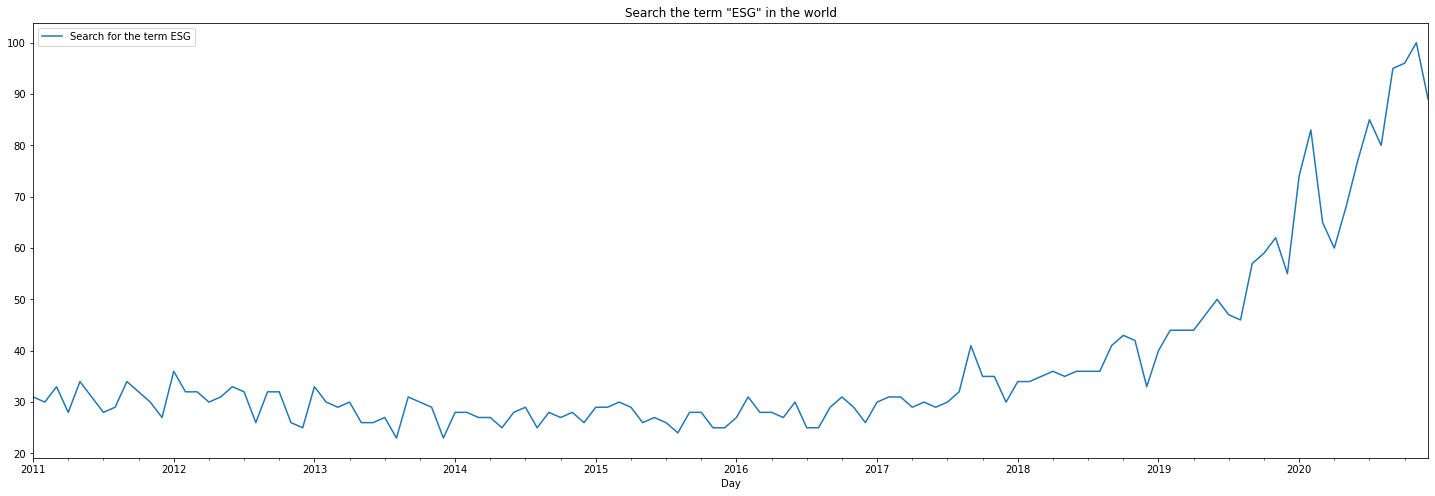

In [4]:
# Generating chart
trends_world.plot('Day',
                  'Search for the term ESG',
                  figsize=(25, 8),
                  title='Search the term "ESG" in the world')

plt.savefig('trends_world.png')
plt.show()

In [5]:
# Upload csv data downloaded from google trends
trends_brasil = pd.read_csv('esg_brasil_2011-2020.csv', sep=',', header=1)

In [6]:
trends_brasil.columns = ['Day', 'Search for the term ESG']
trends_brasil['Day'] = pd.to_datetime(trends_brasil['Day'])
trends_brasil['Search for the term ESG'] = trends_brasil[
    'Search for the term ESG'].astype(float)
trends_brasil.head()

,Day,Search for the term ESG
0,2011-01-01,16.0
1,2011-02-01,16.0
2,2011-03-01,17.0
3,2011-04-01,27.0
4,2011-05-01,14.0


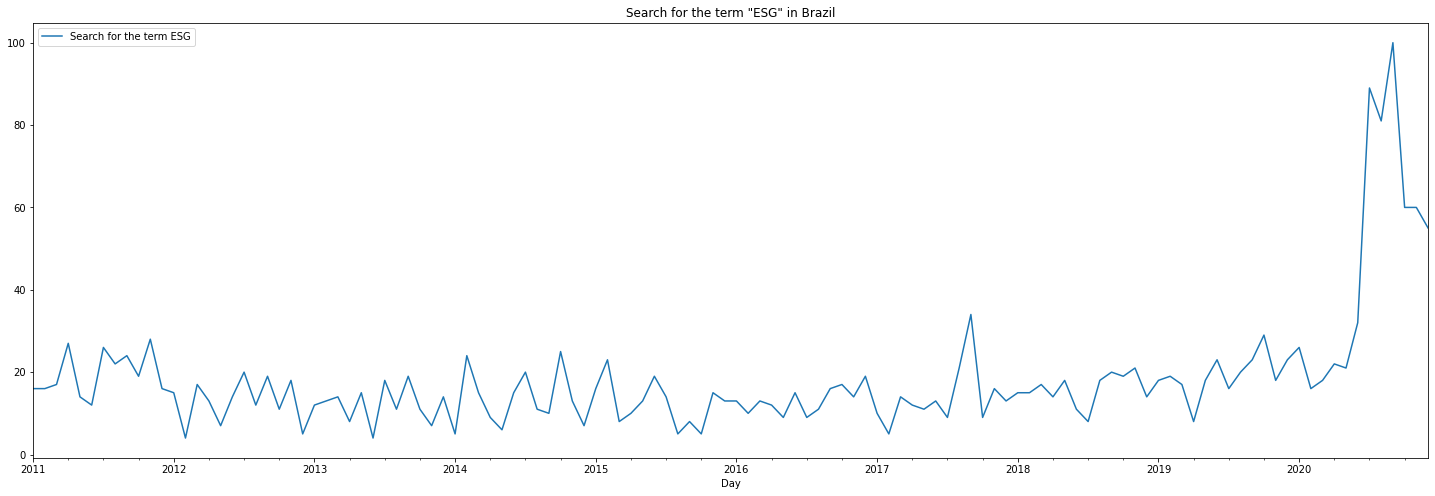

In [7]:
# Generating chart
trends_brasil.plot('Day',
                   'Search for the term ESG',
                   figsize=(25, 8),
                   title='Search for the term "ESG" in Brazil')

plt.savefig('trends_brasil.png')
plt.show()

### Visualization of portfolio composition

In [8]:
# Function for accessing indexes
def buscar_carteira_teorica(indice):
    url = 'http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice={}&amp;idioma=pt-br'.format(
        indice.upper())
    return pd.read_html(url, decimal=',', thousands='.',
                        index_col='Código')[0][:-1]

In [9]:
# IBOVESPA
IBOV = buscar_carteira_teorica('IBOV')
IBOV.index.names = ['tickers']
IBOV.columns = [
    'Company', 'segment', 'theoretical_quantity', 'percentage_share'
]
IBOV.sort_values('percentage_share', ascending=False).head()

,Company,segment,theoretical_quantity,percentage_share
tickers,,,,
VALE3,VALE,ON NM,2837320141,11.876
ITUB4,ITAUUNIBANCO,PN EJ N1,4757466114,6.302
PETR4,PETROBRAS,PN N2,4566457037,5.867
B3SA3,B3,ON NM,1930877944,5.344
BBDC4,BRADESCO,PN N1,4261649634,4.959


In [10]:
# INDICE DE SUSTENTABILIDADE EMPRESARIAL
ISE = buscar_carteira_teorica('ISE')
ISE.index.names = ['tickers']
ISE.columns = [
    'Company', 'segment', 'theoretical_quantity', 'percentage_share'
]
ISE.sort_values('percentage_share', ascending=False).head()

,Company,segment,theoretical_quantity,percentage_share
tickers,,,,
WEGE3,WEG,ON NM,741148001,10.505
SUZB3,SUZANO S.A.,ON NM,724921241,7.254
PETR4,PETROBRAS,PN N2,1618637938,7.118
NTCO3,GRUPO NATURA,ON NM,841083922,6.676
PETR3,PETROBRAS,ON N2,1305861310,5.869


In [11]:
# INDICE DE CARBONO EFICIENTE
ICO2 = buscar_carteira_teorica('ICO2')
ICO2.index.names = ['tickers']
ICO2.columns = [
    'Company', 'segment', 'theoretical_quantity', 'percentage_share'
]
ICO2.sort_values('percentage_share', ascending=False).head()

,Company,segment,theoretical_quantity,percentage_share
tickers,,,,
ITUB4,ITAUUNIBANCO,PN EJ N1,5098496029,9.039
B3SA3,B3,ON NM,2221522263,8.228
BBDC4,BRADESCO,PN N1,4657874445,7.254
MGLU3,MAGAZ LUIZA,ON NM,3092801111,5.009
WEGE3,WEG,ON NM,864152480,4.790


### Download daily quotation data from the indices to visualize the return over time

In [12]:
# Index list
indices_list = inv.get_indices_list('Brazil')
indices_list

['MSCI Brazil Net USD',
 'DJ Brazil',
 'TR Brazil 50',
 'MSCI Brazil Price USD',
 'DJ Brazil Titans 20 ADR',
 'BNY Mellon Brazil ADR',
 'BNY Mellon Brazil ADR TR',
 'BNY Mellon Brazil Classic ADR',
 'BNY Mellon Brazil Classic ADR TR',
 'FTSE RAFI Brazil 50',
 'MSCI Brazil 10 40',
 'DJ BRIC Brazil 15 Capped NTR',
 'DJ BRIC Brazil 15 USD',
 'DJ BRIC Brazil 15 EUR',
 'FTSE Brazil Infrastructure Extended',
 'MSCI Brazil Gross',
 'DJ Brazil Titans 20 ADR TR',
 'MSCI Brazil 25-50 Price',
 'MSCI Brazil 20-50 Gross Return',
 'MSCI Brazil 25-50 Net Return',
 'FTSE Brazil Infrastructure Extended USD PR',
 'FTSE Brazil Infrastructure Extended Total Return',
 'FTSE Brazil Infrastructure Extended Net Tax Total',
 'FTSE Brazil Infrastructure Extended Net Tax USD TR',
 'DJ BRIC Brazil 15 DR',
 'MSCI Brazil',
 'BM&FBOVESPA Unsponsored BDRX',
 'Small Cap Index',
 'Tag Along',
 'Brazil broad-Based',
 'Brazil Index',
 'Mid-Large Cap Index',
 'Public Utilities',
 'BM&FBOVESPA Real Estate IFIX',
 'Financia

In [13]:
# Index overview
indices_overview = inv.get_indices_overview('Brazil')
indices_overview

,country,name,last,high,low,change,change_percentage,currency
0,brazil,Bovespa,118216.80,118909.33,115733.60,+2334.50,+2.01%,BRL
1,brazil,Brazil 50,19553.12,19667.12,19138.72,+384.82,+2.01%,BRL
2,brazil,Tag Along,26293.29,26434.04,25742.65,+503.94,+1.95%,BRL
3,brazil,Brazil broad-Based,4694.69,4721.05,4594.60,+90.80,+1.97%,BRL
4,brazil,Brazil Index,50172.70,50456.26,49125.38,+959.83,+1.95%,BRL
5,brazil,Mid-Large Cap Index,2277.70,2290.60,2231.11,+41.70,+1.86%,BRL
6,brazil,Small Cap Index,2777.71,2792.72,2698.86,+73.10,+2.70%,BRL
7,brazil,Basic Materials,5607.35,5628.94,5494.13,+59.02,+1.06%,BRL
8,brazil,Electrical Energy,79868.88,80191.74,78416.24,+1287.23,+1.64%,BRL
9,brazil,Industrial Sector,23829.12,23959.56,23452.90,+261.07,+1.11%,BRL


In [14]:
# Dataset
close_index = ['Bovespa', 'Corporate Sustainability', 'Carbon Efficient']

mydata = pd.DataFrame()
for c in close_index:
    mydata[c] = inv.get_index_historical_data(c,
                                              country='brazil',
                                              from_date='01/01/2011',
                                              to_date='31/12/2020')["Close"]

mydata.head()

,Bovespa,Corporate Sustainability,Carbon Efficient
Date,,,
2011-01-03,69962.32,2119.01,1121.29
2011-01-04,70317.79,2140.21,1127.49
2011-01-05,71091.03,2165.54,1138.77
2011-01-06,70578.83,2148.27,1126.40
2011-01-07,70057.20,2137.57,1113.95


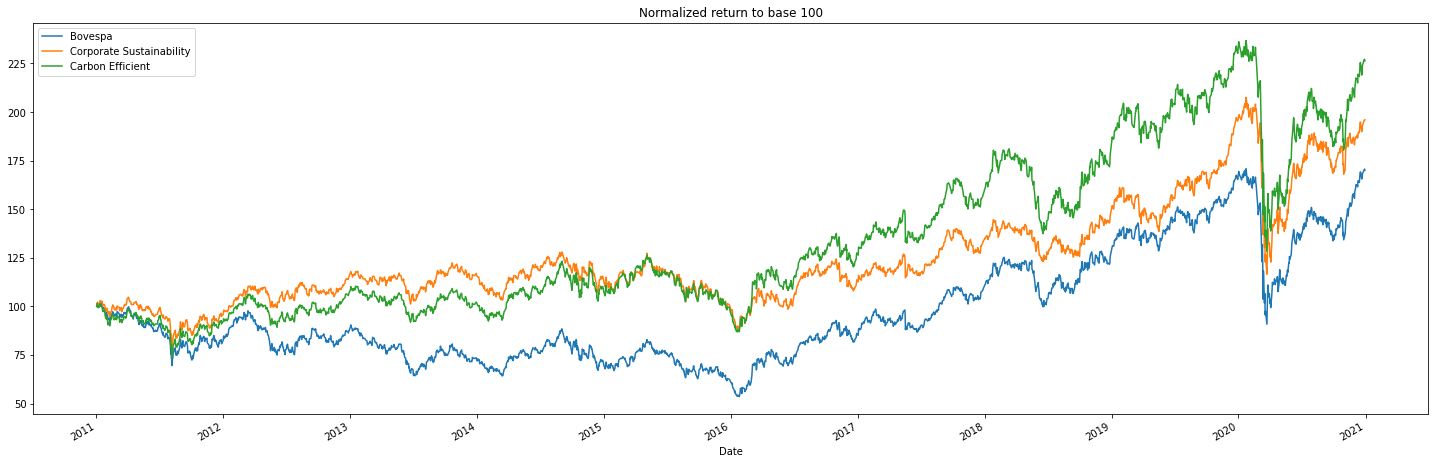

In [15]:
# Normalized return to base 100
(mydata / mydata.iloc[0] * 100).plot(figsize=(25, 8), title='Normalized return to base 100')
plt.savefig('index_return-2011_2020.png')
plt.show()